<a href="https://colab.research.google.com/github/layasd/PHYS6711/blob/main/PHYS6711_3711_Lec02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content for Lec02 Statistical nature of measurements
## Simple statistics

In [ ]:
# load modules
import numpy as np
import matplotlib.pyplot as plt

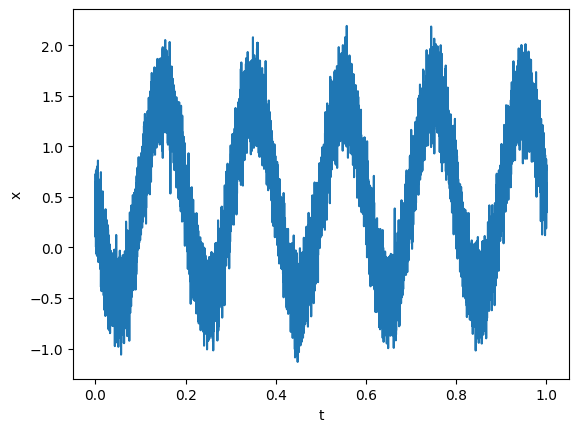

In [ ]:
# generate a noisy sinewave
t = np.linspace(0,1,16385)
f1 = 5
x = 1.0*np.sin(2*np.pi*f1*t-np.pi)  # generate a sine wave of amplitude 1 and frequency f1

# add a DC offset
x_DC = 0.5
x = x + x_DC

# add noise
noise = np.random.normal(0, 0.2, x.shape)
x += noise

# plot results
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

Calculate the mean, std, and RMS.

In [ ]:
x_mean = np.mean(x)
x_std = np.std(x)
x_rms = np.sqrt(sum(x**2)/len(x))

# print the results up to two decimal places
print('Mean: %.2f' % x_mean)
print('Std: %.2f' % x_std)
print('RMS: %.2f' % x_rms)

Mean: 0.50
Std: 0.74
RMS: 0.89


## Distribution and histogram
Show different distributions

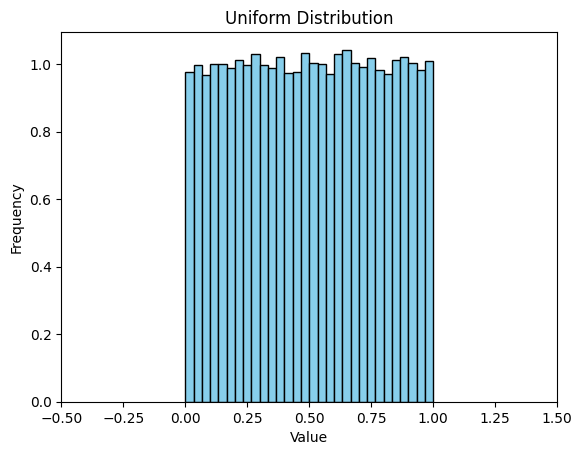

In [ ]:
# histogram of a uniform distribution
x = np.random.uniform(0,1,100000)

# 2. Plot the histogram
plt.hist(x, bins=30, color='skyblue', edgecolor='black', density=True)

# Add labels and a title for clarity
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(-0.5, 1.5)

# 4. Display the plot
plt.show()

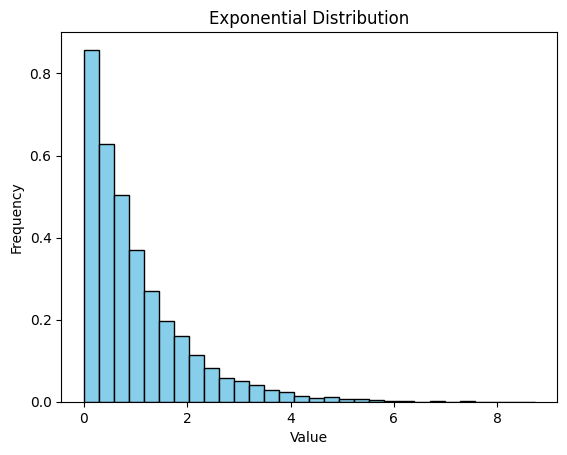

In [ ]:
# histogram of an exponential distribution
x = np.random.exponential(scale=1, size=10000)

# 2. Plot the histogram
plt.hist(x, bins=30, color='skyblue', edgecolor='black', density=True)

# Add labels and a title for clarity
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xlim(-0.5, 1.5)

# 4. Display the plot
plt.show()

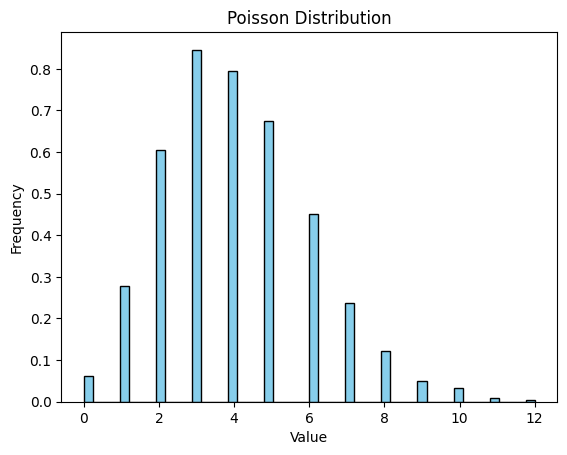

In [ ]:
# histogram of an poisson distribution
# Generate 1000 random values with an average rate (lambda) of 4
lam = 4
x = np.random.poisson(lam=4, size=1000)

# 2. Plot the histogram
plt.hist(x, bins=50, color='skyblue', edgecolor='black', density=True)

# Add labels and a title for clarity
plt.title('Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xlim(-0.5, 1.5)

# 4. Display the plot
plt.show()

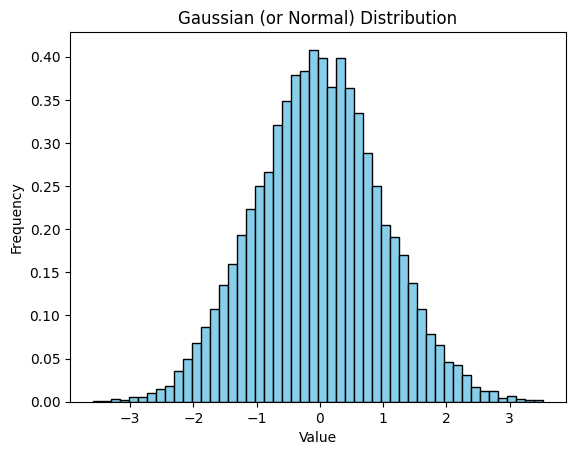

In [ ]:
# histogram of an poisson distribution
# gaussian distribution centred at 0 and standard deviation of 1
x = np.random.normal(0, 1, 10000)

# 2. Plot the histogram
plt.hist(x, bins=50, color='skyblue', edgecolor='black', density=True)

# Add labels and a title for clarity
plt.title('Gaussian (or Normal) Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xlim(-0.5, 1.5)

# 4. Display the plot
plt.show()

## Random samples
Test whether we get a uniform distribution from a random sample of a uniform distribution.

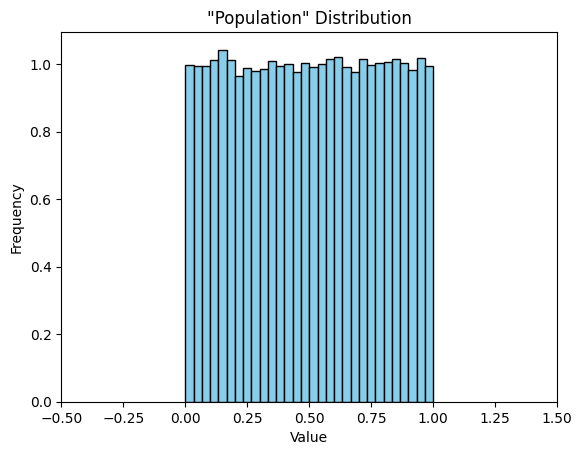

Mean: 0.500
Std: 0.289
RMS: 0.578


In [ ]:
# histogram of a uniform distribution
x_p = np.random.uniform(0,1,100000)

# 2. Plot the histogram
plt.hist(x_p, bins=30, color='skyblue', edgecolor='black', density=True)

# Add labels and a title for clarity
plt.title('"Population" Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(-0.5, 1.5)

# 4. Display the plot
plt.show()

# run this multiple times to get different samples
xp_mean = np.mean(x_p)
xp_std = np.std(x_p, ddof=0)
xp_rms = np.sqrt(sum(x_p**2)/len(x_p))

# print the results up to two decimal places
print('Mean: %.3f' % xp_mean)
print('Std: %.3f' % xp_std)
print('RMS: %.3f' % xp_rms)

Sample Mean: 0.525
Sample Std: 0.289
Sample RMS: 0.598


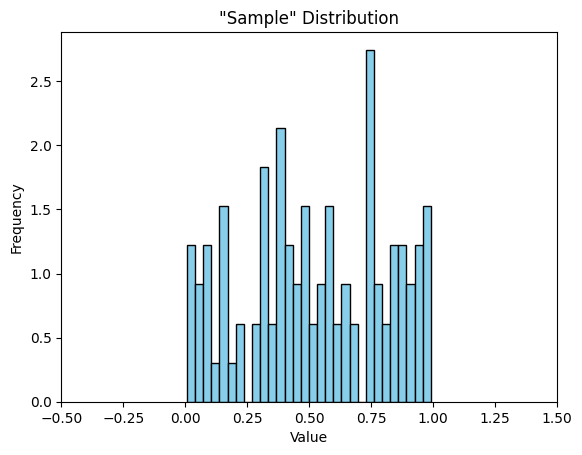

In [ ]:
# get a 1000 random samples from x_p
x_s = np.random.choice(x_p, 100, replace=False)

# plot the distribution
plt.hist(x_s, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('"Sample" Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(-0.5, 1.5)

# run this multiple times to get different samples
xs_mean = np.mean(x_s)
xs_std = np.std(x_s, ddof=1)
xs_rms = np.sqrt(sum(x_s**2)/len(x_s))

# print the results up to two decimal places
print('Sample Mean: %.3f' % xs_mean)
print('Sample Std: %.3f' % xs_std)
print('Sample RMS: %.3f' % xs_rms)

## Central limit theorm demo
Let's demonstrate the Central Limit Theorm by taking random samples out of some arbitrary dataset. For example, the noisy sinusoidal dataset.

In [ ]:
# generate a noisy sinewave
t = np.linspace(0,1,10000)
f1 = 5
x = 1.0*np.sin(2*np.pi*f1*t-np.pi)  # generate a sine wave of amplitude 1 and frequency f1

# add a DC offset
x_DC = 0.5
x = x + x_DC

# add noise
noise = np.random.normal(0, 0.2, x.shape)
x += noise

# Plot the histogram
plt.hist(x, bins=50, color='skyblue', edgecolor='black', density=True)

# Add labels and a title for clarity
plt.title('Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

# statistics of the distribution
print('Mean: %.3f' % np.mean(x))  # mean of the sample means
print('Std: %.3f' % np.std(x)) # sigma of the sample means

NameError: name 'np' is not defined

Let's take a few random samples from this distribution and take the mean of each sample.

In [ ]:
# take 50 (random) measurements out of this distribution
x_s = np.random.choice(x_p, 50, replace=False)

# take the mean
print('Sample mean: %.3f' % np.mean(x_s))

# take the standard error of the mean (SEM)
SEM = np.std(x_s, ddof=1)/np.sqrt(50)
print('Sigma of the mean: %.3f' % SEM)

Sample mean: 0.565
Sigma of the mean: 0.038


Do this many times and create a distribution for the sample means.

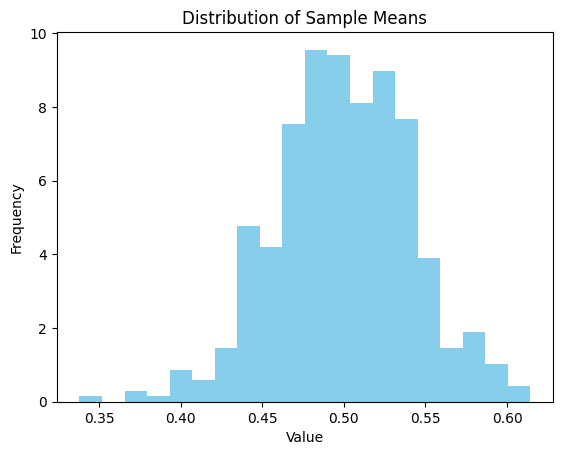

Mean: 0.500
Std: 0.041


In [ ]:
x_s_means = []
for i in range(500):
  x_s = np.random.choice(x_p, 50, replace=False)
  x_s_means.append(np.mean(x_s))    # create a list or array of sample means

# Plot the distribution of means
plt.hist(x_s_means, bins=20, color='skyblue', density=True)
plt.title('Distribution of Sample Means')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# statistics of the sample distribution
print('Mean: %.3f' % np.mean(x_s_means))  # mean of the sample means
print('Std: %.3f' % np.std(x_s_means)) # sigma of the sample means



## Propagation of errors
To get an intuition of how errors propagate, we will use a Monte Carlo simulation or simply, we simulate making measurements with random errors and see how the errors stack up once we multiple or add them up.

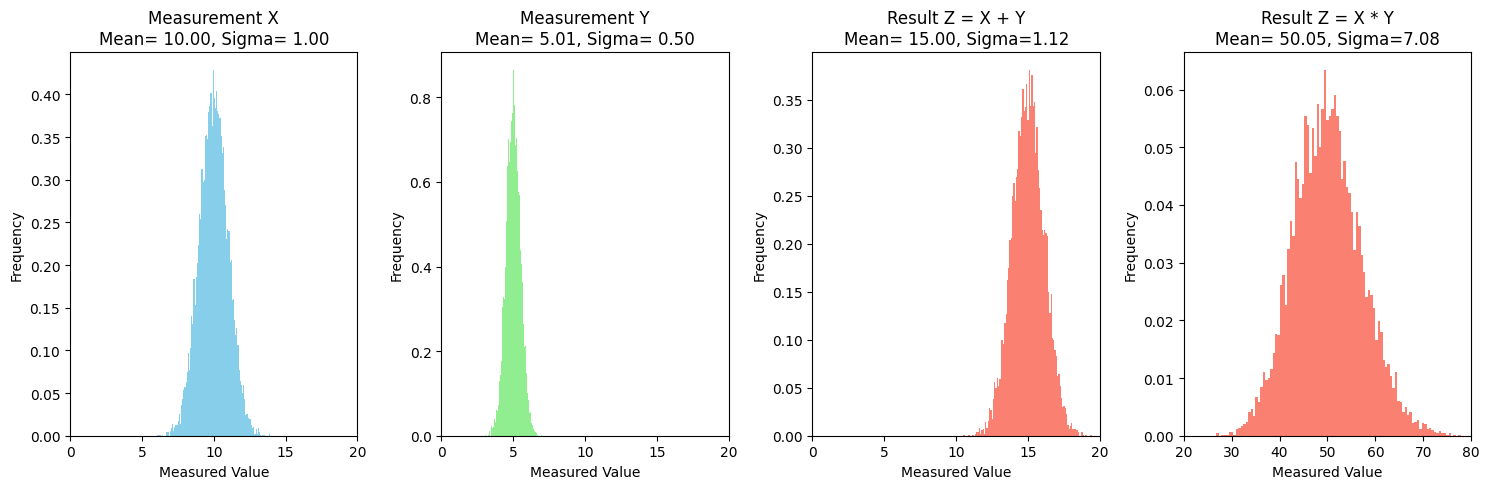

In [ ]:
# Simulate 10,000 measurements
np.random.seed(42)
N = 10000

# Define our measurements (Mean and Standard Deviation)
mu_x, sigma_x = 10.0, 1.0
mu_y, sigma_y = 5.0, 0.5

# Generate distributions out of the mean and std
X = np.random.normal(mu_x, sigma_x, N)
Y = np.random.normal(mu_y, sigma_y, N)
mu_x_act = np.mean(X)   # actual mean of the distribution
mu_y_act = np.mean(Y)
sigma_x_act = np.std(X)   # actual sigma of the distribution
sigma_y_act = np.std(Y)

# Perform the math operations
Z_add = X + Y
Area = X * Y
# statistics of new distribution
mu_Z_act = np.mean(Z_add)   # actual mean of the distribution
mu_Area_act = np.mean(Area)
sigma_Z_act = np.std(Z_add)   # actual sigma of the distribution
sigma_Area_act = np.std(Area)


# --- PLOTTING the sum---
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# 1. Plot Measurement X
axs[0].hist(X, bins=100, color='skyblue', density=True)
axs[0].set_title(f'Measurement X\nMean={mu_x_act: 0.2f}, Sigma={sigma_x_act: 0.2f}')

# 2. Plot Measurement Y
axs[1].hist(Y, bins=100, color='lightgreen', density=True)
axs[1].set_title(f'Measurement Y\nMean={mu_y_act: 0.2f}, Sigma={sigma_y_act: 0.2f}')

# 3. Plot Result (Addition)
axs[2].hist(Z_add, bins=100, color='salmon', density=True)
expected_sigma_z = np.sqrt(sigma_x**2 + sigma_y**2)
#axs[2].set_title(f'Result Z = X + Y\nMean={mu_x+mu_y}, Unc={expected_sigma_z:.2f}')
axs[2].set_title(f'Result Z = X + Y\nMean={mu_Z_act: 0.2f}, Sigma={sigma_Z_act:.2f}')

# 3. Plot Result (Multiplication)
axs[3].hist(Area, bins=100, color='salmon', density=True)
expected_sigma_z = np.sqrt(sigma_x**2 + sigma_y**2)
axs[3].set_title(f'Result Z = X * Y\nMean={mu_Area_act: 0.2f}, Sigma={sigma_Area_act:.2f}')

for ax in axs:
    ax.set_xlabel('Measured Value')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 20)

axs[3].set_xlim(20, 80)

plt.tight_layout()
plt.show()

In [ ]:
# Analytical results for the sum
mu_Z_ana = mu_x + mu_y
sigma_Z_ana =  np.sqrt(sigma_x**2 + sigma_y**2)
print('Mean for sum: %.3f' % mu_Z_ana)
print('Sigma for sum: %.3f' % sigma_Z_ana)

# Analytical results for the area
mu_Z_ana = mu_x * mu_y
sigma_Z_ana =  np.sqrt((sigma_x/mu_x)**2 + (sigma_y/mu_y)**2)*mu_x*mu_y
print('Mean for product: %.3f' % mu_Z_ana)
print('Sigma for product: %.3f' % sigma_Z_ana)

Mean for sum: 15.000
Sigma for sum: 1.118
Mean for product: 50.000
Sigma for product: 7.071
